In [61]:
from math   import sin, cos, pi
from pylab  import plot,xlabel,ylabel,show,legend,title,annotate
from sklearn.metrics import mean_squared_error

In [56]:
# ----- Initial Variables -----

a       = 0.082     # slit width (mm)
lmbda   = 0.000550  # wavelength of bulb source (mm)
l       = 490       # distance between double slit and detector (mm)
d       = 0.41      # slit separation, center-to-center (mm)
I_0_y   = 3.4       # position of the center maximum (mm)
I_0     = 29.3333   # intensity at the center maximum (beeps per 10 seconds)
 
# ----- Positions Tested -----
# This block makes a list for the detector (y) position values that were 
# tested starting at y_start ending at y_end. It assumes that measurements 
# were taken at even intervals given by 'increment'. Students will likely 
# have a list or table of the individual detector position values.

y_start = I_0_y - 3
y_end = I_0_y + 3
increment = 0.1

y = [round(y_start + i * increment, 2) for i in 
     range(int((y_end - y_start) / increment) + 1)]


In [57]:
# ----- Get Experimental Data -----
# The values in the list I_e are the values that students record from the 
# photon counter when conducting the experiment.

data_matrix = [
    [1, 2, 1],
    [1, 2, 3],
    [0, 2, 3],
    [3, 1, 0],
    [5, 7, 2],
    [3, 6, 2],
    [7, 4, 3],
    [3, 4, 2],
    [3, 6, 2],
    [2, 3, 10],
    [15, 10, 11],
    [6, 7, 5],
    [5, 6, 7],
    [8, 1, 5],
    [7, 10, 7],
    [11, 7, 11],
    [11, 11, 7],
    [11, 11, 14],
    [13, 17, 12],
    [8, 11, 11],
    [6, 8, 8],
    [1, 7, 6],
    [10, 15, 15],
    [23, 20, 28],
    [23, 20, 14],
    [9, 11, 20],
    [5, 11, 12],
    [3, 6, 7],
    [10, 16, 17],
    [25, 17, 27],
    [24, 35, 29],
    [20, 16, 33],
    [19, 16, 13],
    [10, 7, 11],
    [6, 10, 9],
    [16, 18, 14],
    [19, 28, 24],
    [26, 24, 29],
    [20, 18, 15],
    [18, 15, 11],
    [6, 5, 11],
    [6, 7, 10],
    [12, 14, 15],
    [13, 27, 15],
    [16, 27, 24],
    [20, 18, 15],
    [12, 15, 14],
    [11, 5, 6],
    [8, 2, 3],
    [7, 8, 6],
    [10, 5, 6],
    [8, 10, 8],
    [10, 14, 9],
    [3, 6, 9],
    [6, 1, 1],
    [7, 11, 8],
    [6, 4, 4],
    [4, 5, 5],
    [3, 3, 6],
    [1, 2, 3],
    [4, 4, 1]
]

"""
# Alternatively, you could input the values directly into the program

data_matrix = []

for i in range(len(y)):
    data_matrix.append(input("\nIntensity for position " + str(y[i]) + ": "))

    """

# Calculate the average of each sublist
I_e = [sum(sublist) / len(sublist) for sublist in data_matrix]


In [58]:
# ----- Calculation -----
# This is the equation for the intensity of a two slit interference pattern 
# given in equation 33.28 of the Knight text using the variables defined 
# above. The intensity at the center point is defined as I_0 because it
# typically gives an  undefined value. The term (i - I_0_y) is the distance 
# the position is from the center fringe.

I_c = [I_0 if (i - I_0_y) == 0 else
       I_0 * (sin(pi * a * (i - I_0_y) / lmbda / l) / (pi * a * (i - I_0_y) 
       / (lmbda * l))) ** 2 * (cos(pi * d * (i - I_0_y) / lmbda / l)) ** 2 
       for i in y]

In [71]:
# ----- Mean Squared Error -----
# This equation gives the M

mse = mean_squared_error(I_e, I_c)

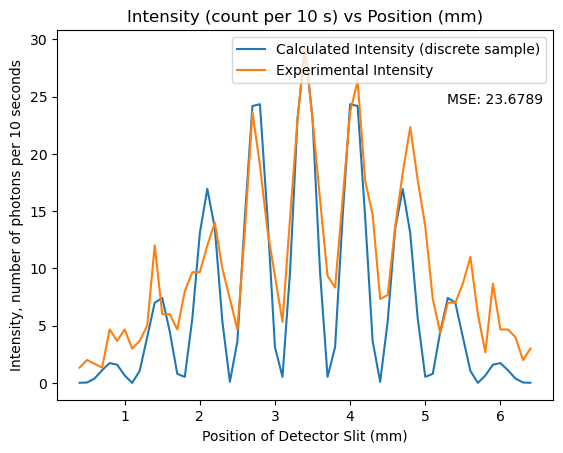

In [80]:
# ----- Generate Plots -----
# This block plots position versus intensity for both the calculated and 
# experimental results on the same graph.

plot(y, I_c, label="Calculated Intensity (discrete sample)")
plot(y, I_e, label="Experimental Intensity")

annotate(f'MSE: {mse:.4f}', xy=(0.98, 0.8), xycoords='axes fraction', ha='right', fontsize=10)

title("Intensity (count per 10 s) vs Position (mm)")
xlabel("Position of Detector Slit (mm)")
ylabel("Intensity, number of photons per 10 seconds")
legend()
show()